# Python

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/230px-Python-logo-notext.svg.png)

Simulation for illustrative purposes

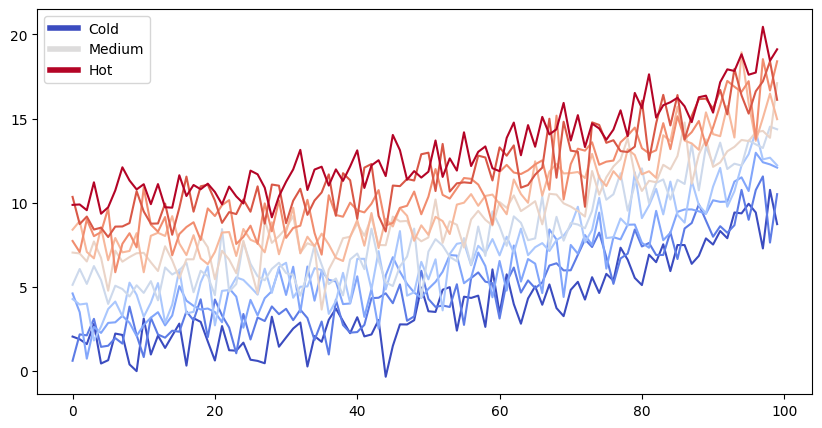

In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

<iframe src="https://jamanetwork.com/journals/jama/article-abstract/2819312" width="100%" height="600px" style="border:none;></iframe>

[Exemplary Figure 3](JAMA.pdf)

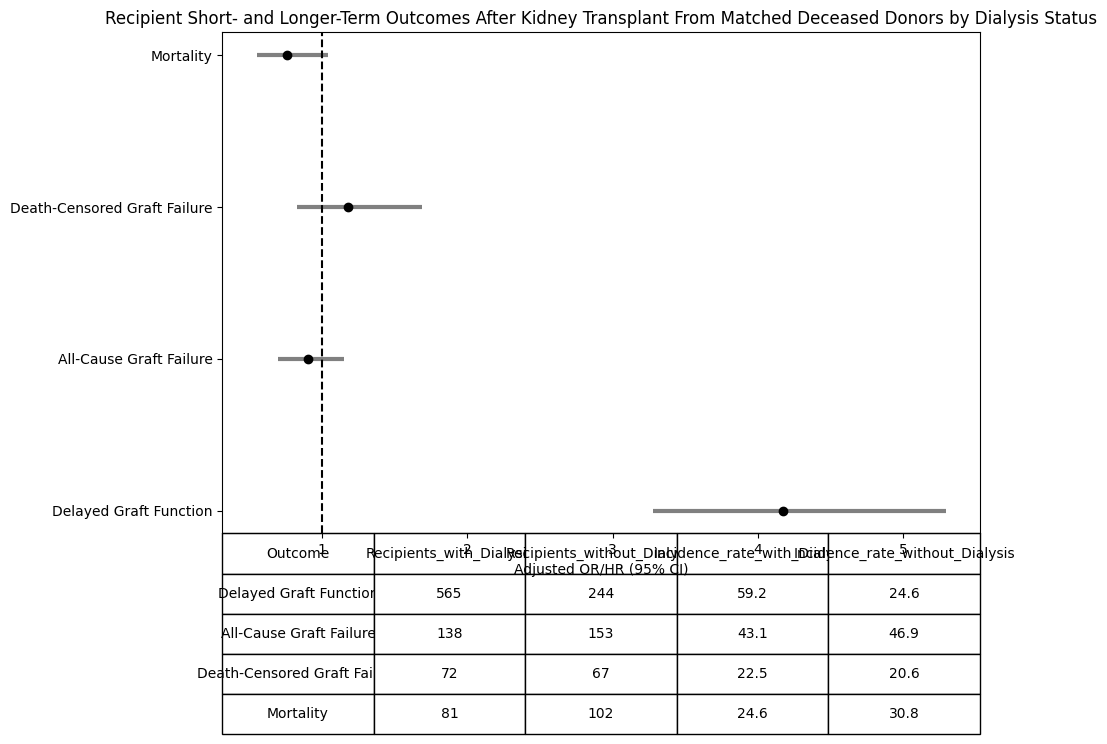

In [3]:
# GPT-4o first iteration!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate data
np.random.seed(42)
data = {
    'Outcome': ['Delayed Graft Function', 'All-Cause Graft Failure', 'Death-Censored Graft Failure', 'Mortality'],
    'Recipients_with_Dialysis': [565, 138, 72, 81],
    'Recipients_without_Dialysis': [244, 153, 67, 102],
    'Incidence_rate_with_Dialysis': [59.2, 43.1, 22.5, 24.6],
    'Incidence_rate_without_Dialysis': [24.6, 46.9, 20.6, 30.8],
    'Adjusted_OR_HR': [4.17, 0.90, 1.18, 0.76],
    'CI_lower': [3.28, 0.70, 0.83, 0.55],
    'CI_upper': [5.29, 1.15, 1.69, 1.04]
}

df = pd.DataFrame(data)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 8))

# Create the table
table_data = df[['Outcome', 'Recipients_with_Dialysis', 'Recipients_without_Dialysis', 'Incidence_rate_with_Dialysis', 'Incidence_rate_without_Dialysis']]
table = plt.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='top', bbox=[0, -0.4, 1, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Create the forest plot
y_pos = np.arange(len(df))
ax.errorbar(df['Adjusted_OR_HR'], y_pos, xerr=[df['Adjusted_OR_HR'] - df['CI_lower'], df['CI_upper'] - df['Adjusted_OR_HR']], fmt='o', color='black', ecolor='gray', elinewidth=3, capsize=0)

# Set labels
ax.set_yticks(y_pos)
ax.set_yticklabels(df['Outcome'])
ax.set_xlabel('Adjusted OR/HR (95% CI)')
ax.axvline(x=1, color='black', linestyle='--')

# Set title and layout
plt.title('Recipient Short- and Longer-Term Outcomes After Kidney Transplant From Matched Deceased Donors by Dialysis Status')
plt.tight_layout()

# Show plot
plt.show()